<a href="https://colab.research.google.com/github/Nishtha077/Accelerometer-Gyrometer-Activity-Classification/blob/main/accelerometer_gyro_mobile_phone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Reading data

In [113]:
import pandas as pd

In [114]:
!pip install ucimlrepo

In [115]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
accelerometer_gyro_mobile_phone = fetch_ucirepo(id=755)

# data (as pandas dataframes)
df = accelerometer_gyro_mobile_phone.data.features
y = accelerometer_gyro_mobile_phone.data.targets

# metadata
print(accelerometer_gyro_mobile_phone.metadata)

# variable information
print(accelerometer_gyro_mobile_phone.variables)


{'uci_id': 755, 'name': 'Accelerometer Gyro Mobile Phone', 'repository_url': 'https://archive.ics.uci.edu/dataset/755/accelerometer+gyro+mobile+phone+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/755/data.csv', 'abstract': 'data collected on 2022, in King Saud University in riyadh for recognizing human activities using mobile phone IMU sensors (Accelerometer, and Gyroscope). these activity is calssified to standing(stop), or walking.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Sequential', 'Multivariate', 'Time-Series'], 'num_instances': 31991, 'num_features': 8, 'feature_types': ['Real', 'Categorical'], 'demographics': [], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2022, 'last_updated': 'Tue Apr 09 2024', 'dataset_doi': 'https://doi.org/10.3390/s22176513', 'creators': ['Abdullah AlSahly'], 'intro_paper': {'title': 'Handheld Device-Based I

In [116]:
df

,accX,accY,accZ,gyroX,gyroY,gyroZ,timestamp,Activity
0,-0.496517,3.785628,8.954828,-0.142849,-0.126159,-0.022539,34:22.9,1
1,-0.462388,3.869603,9.281898,0.084349,0.096695,0.092130,34:23.0,1
2,-0.296084,3.820505,8.930728,0.061763,0.051543,0.071287,34:23.1,1
3,-0.469723,3.890110,8.744067,0.007641,0.028679,0.109433,34:23.2,1
4,-0.472418,4.109105,8.941207,-0.123640,0.099057,0.051943,34:23.3,1
...,...,...,...,...,...,...,...,...
31986,-0.488734,1.610800,10.610386,0.079187,-0.174218,-0.050365,03:15.1,1
31987,-0.049397,2.769092,7.008276,-0.083853,0.007656,-0.045658,03:15.2,1
31988,0.291294,3.002007,6.732400,0.005984,-0.058994,-0.087044,03:15.3,1
31989,0.256267,4.069138,8.687933,0.061487,-0.016278,-0.088728,03:15.4,1


# 2. Understanding the data

In [117]:
df.shape

(31991, 8)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31991 entries, 0 to 31990
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   accX       31991 non-null  float64
 1   accY       31991 non-null  float64
 2   accZ       31991 non-null  float64
 3   gyroX      31991 non-null  float64
 4   gyroY      31991 non-null  float64
 5   gyroZ      31991 non-null  float64
 6   timestamp  31991 non-null  object 
 7   Activity   31991 non-null  int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 2.0+ MB


In [119]:
from datetime import datetime

In [120]:
# converting timestamp to time series data instead of an object

df['timestamp'] = pd.to_datetime(df['timestamp'], errors="coerce")
df.info()

<ipython-input-120-e749acad6e12>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['timestamp'] = pd.to_datetime(df['timestamp'], errors="coerce")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31991 entries, 0 to 31990
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   accX       31991 non-null  float64       
 1   accY       31991 non-null  float64       
 2   accZ       31991 non-null  float64       
 3   gyroX      31991 non-null  float64       
 4   gyroY      31991 non-null  float64       
 5   gyroZ      31991 non-null  float64       
 6   timestamp  12121 non-null  datetime64[ns]
 7   Activity   31991 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 2.0 MB


In [121]:
# Null values exist in timeframe, so need for imputation

In [122]:
df.describe()

,accX,accY,accZ,gyroX,gyroY,gyroZ,timestamp,Activity
count,31991.000000,31991.000000,31991.000000,31991.000000,31991.000000,31991.000000,12121,31991.000000
mean,0.023825,2.153858,9.537909,-0.004493,-0.014756,-0.007021,2024-04-25 10:18:22.762973440,0.982151
min,-3.673361,-4.386029,4.296066,-1.470421,-1.430659,-1.894102,2022-06-25 14:05:00,0.000000
25%,-0.472193,1.413062,7.794217,-0.149783,-0.162656,-0.154126,2024-04-25 06:03:06,1.000000
50%,-0.024998,2.119143,9.406739,0.022301,-0.011060,0.005261,2024-04-25 13:14:54,1.000000
75%,0.477208,2.928435,11.158845,0.177978,0.124966,0.152061,2024-04-25 18:33:54,1.000000
max,4.678671,6.377039,17.591568,1.332722,1.480135,1.482268,2024-04-25 23:59:54,1.000000
std,0.741396,1.085466,2.056358,0.307643,0.249201,0.266120,NaN,0.132404


In [123]:
# Scaling is needed

In [124]:
df.duplicated().sum()

144

In [125]:
# A need to remove duplicate rows to remove any biases.

### Exploratory Data Analaysis

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: ylabel='count'>

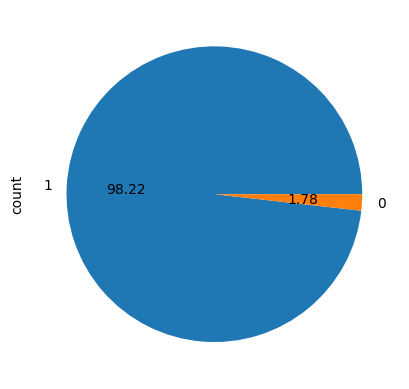

In [127]:
 df["Activity"].value_counts().plot(kind="pie", autopct="%.2f")

<Axes: >

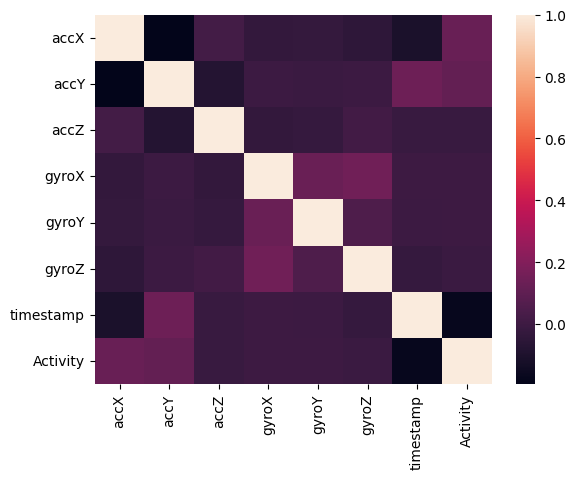

In [128]:
sns.heatmap(df.corr())

In [129]:
# No particular relation between timestamp and any column

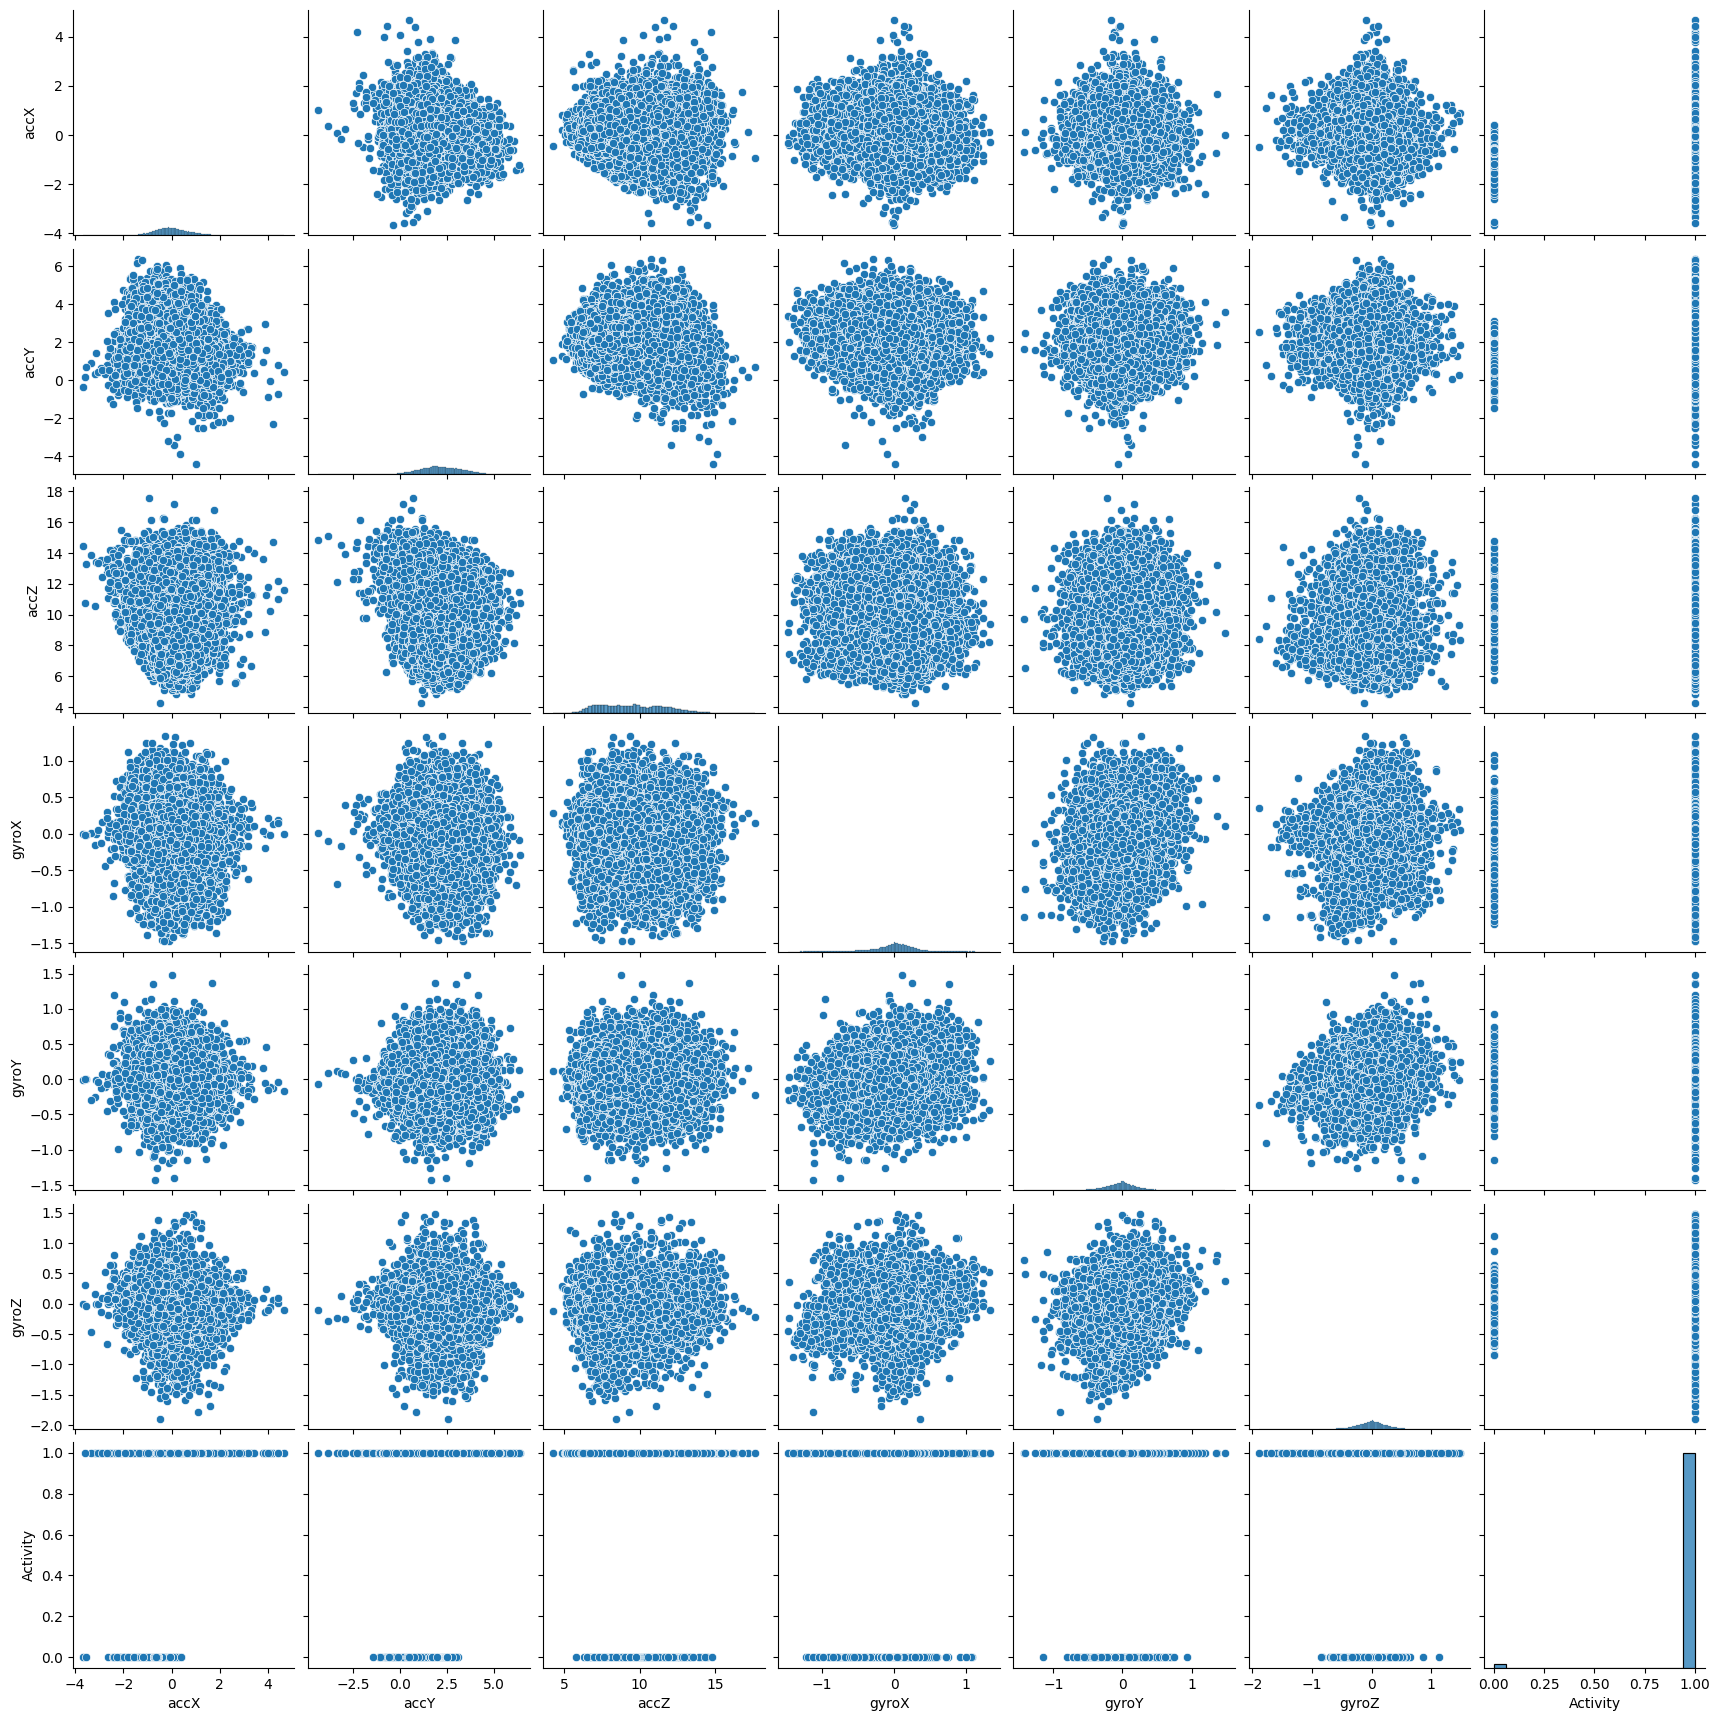

In [130]:
sns.pairplot(df)

In [131]:
# No particular relationship observed between any two numerical columns

<Axes: xlabel='accX', ylabel='Density'>

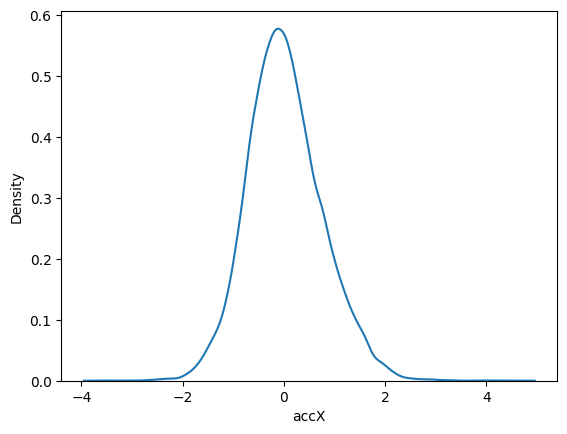

In [132]:
sns.kdeplot(df["accX"])

<Axes: xlabel='accY', ylabel='Density'>

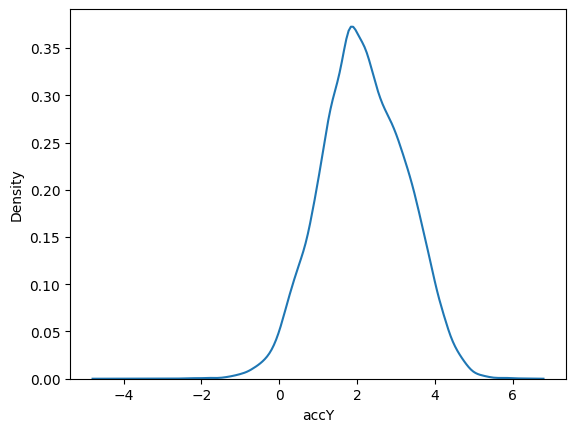

In [133]:
sns.kdeplot(df["accY"])

In [134]:
# Normalization needed as this is not normalized around 0

<Axes: xlabel='accZ', ylabel='Density'>

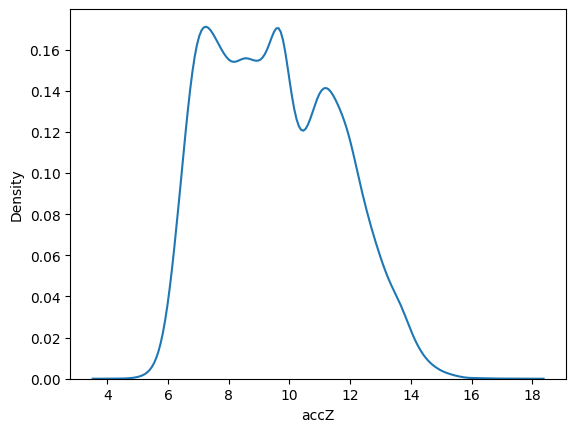

In [135]:
sns.kdeplot(df["accZ"])

In [136]:
# accZ needs Normalization as data is not in a normal curve

<Axes: xlabel='gyroX', ylabel='Density'>

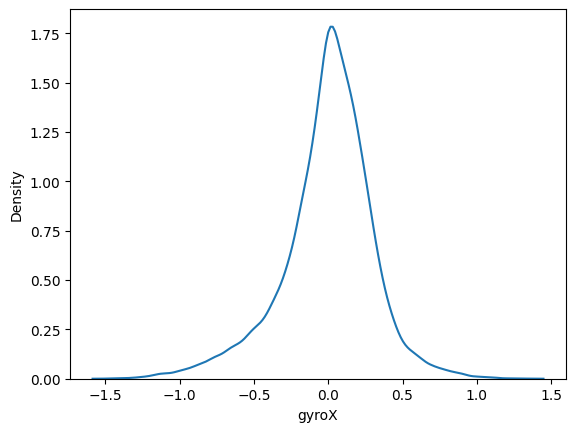

In [137]:
sns.kdeplot(df["gyroX"])

<Axes: xlabel='gyroY', ylabel='Density'>

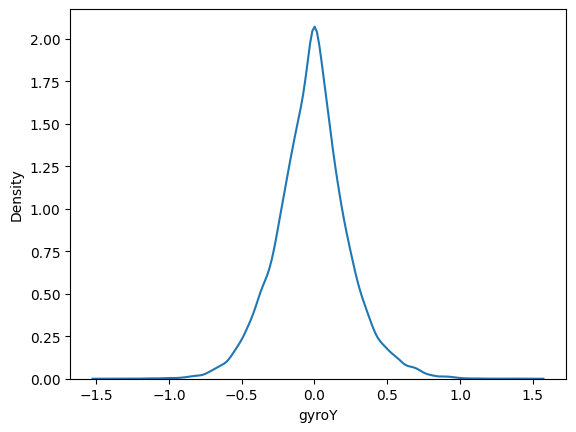

In [138]:
sns.kdeplot(df["gyroY"])

<Axes: xlabel='gyroZ', ylabel='Density'>

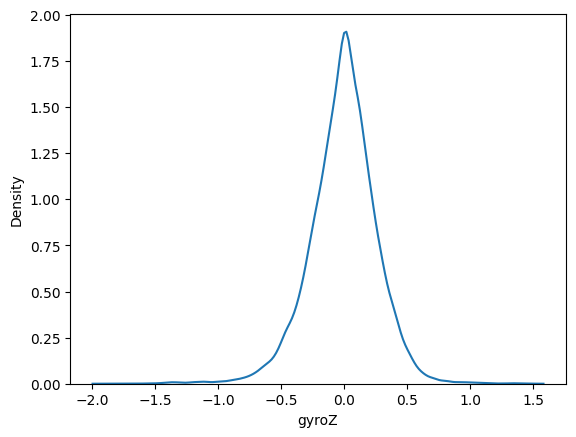

In [139]:
sns.kdeplot(df["gyroZ"])

# Preprocessing

In [140]:
df = df.drop_duplicates(keep="first")
df.shape

(31847, 8)

In [141]:
df = df.drop(columns = ["timestamp"])
df

,accX,accY,accZ,gyroX,gyroY,gyroZ,Activity
0,-0.496517,3.785628,8.954828,-0.142849,-0.126159,-0.022539,1
1,-0.462388,3.869603,9.281898,0.084349,0.096695,0.092130,1
2,-0.296084,3.820505,8.930728,0.061763,0.051543,0.071287,1
3,-0.469723,3.890110,8.744067,0.007641,0.028679,0.109433,1
4,-0.472418,4.109105,8.941207,-0.123640,0.099057,0.051943,1
...,...,...,...,...,...,...,...
31986,-0.488734,1.610800,10.610386,0.079187,-0.174218,-0.050365,1
31987,-0.049397,2.769092,7.008276,-0.083853,0.007656,-0.045658,1
31988,0.291294,3.002007,6.732400,0.005984,-0.058994,-0.087044,1
31989,0.256267,4.069138,8.687933,0.061487,-0.016278,-0.088728,1


In [142]:
input = df.drop(columns=["Activity"])
target = df["Activity"]

In [143]:
input

,accX,accY,accZ,gyroX,gyroY,gyroZ
0,-0.496517,3.785628,8.954828,-0.142849,-0.126159,-0.022539
1,-0.462388,3.869603,9.281898,0.084349,0.096695,0.092130
2,-0.296084,3.820505,8.930728,0.061763,0.051543,0.071287
3,-0.469723,3.890110,8.744067,0.007641,0.028679,0.109433
4,-0.472418,4.109105,8.941207,-0.123640,0.099057,0.051943
...,...,...,...,...,...,...
31986,-0.488734,1.610800,10.610386,0.079187,-0.174218,-0.050365
31987,-0.049397,2.769092,7.008276,-0.083853,0.007656,-0.045658
31988,0.291294,3.002007,6.732400,0.005984,-0.058994,-0.087044
31989,0.256267,4.069138,8.687933,0.061487,-0.016278,-0.088728


In [144]:
target

0        1
1        1
2        1
3        1
4        1
        ..
31986    1
31987    1
31988    1
31989    1
31990    1
Name: Activity, Length: 31847, dtype: int64

In [145]:
# train test split
from sklearn.model_selection import train_test_split

In [146]:
X_train, X_test, y_train, y_test = train_test_split(input, target, test_size = 0.2)

In [147]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

In [148]:
transformer = ColumnTransformer(transformers=[
    ("minmax", MinMaxScaler(), ["accY", "accZ"]),
    ("stdsc", StandardScaler(), ["accX", "gyroX", "gyroY", "gyroZ"])
])

In [149]:
X_train_scaled = transformer.fit_transform(X_train)
X_test_scaled = transformer.transform(X_test)

In [150]:
X_train

,accX,accY,accZ,gyroX,gyroY,gyroZ
19744,-0.439785,2.845583,11.535612,0.034159,0.026126,0.001161
14078,-0.539927,0.831820,11.810440,-0.015320,0.145230,0.336936
6184,0.000449,2.839296,8.440348,0.236369,-0.006717,-0.299277
26727,-1.294658,3.177143,11.562406,0.006016,-0.288147,0.143301
20223,-0.940494,1.204545,8.155940,0.028945,-0.032069,-0.012079
...,...,...,...,...,...,...
540,-0.262853,1.440155,13.085489,-0.165444,-0.222015,0.048230
5030,-1.117127,1.850153,9.387279,-0.522980,-0.143377,0.117655
22781,2.705025,0.887804,9.798025,-0.474904,0.069377,0.405209
3737,-0.379611,3.848347,8.477172,0.173792,-0.081247,-0.443187


In [151]:
X_train_scaled = pd.DataFrame(X_train, columns=input.columns)
X_test_scaled = pd.DataFrame(X_test, columns=input.columns)

In [152]:
X_train.head()

,accX,accY,accZ,gyroX,gyroY,gyroZ
19744,-0.439785,2.845583,11.535612,0.034159,0.026126,0.001161
14078,-0.539927,0.831820,11.810440,-0.015320,0.145230,0.336936
6184,0.000449,2.839296,8.440348,0.236369,-0.006717,-0.299277
26727,-1.294658,3.177143,11.562406,0.006016,-0.288147,0.143301
20223,-0.940494,1.204545,8.155940,0.028945,-0.032069,-0.012079


# Training the model

In [153]:
# importing the metrics for classification
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

## 1. Logistic Regression:
### Reason
- Logistic Regression is a simple and efficient model for binary classification tasks.
- It's easy to interpret, making it useful for understanding the relationship between features and the target variable.


In [154]:
from sklearn.linear_model import LogisticRegression
clf4_lr = LogisticRegression()
clf4_lr.fit(X_train, y_train)

LogisticRegression()

In [155]:
train_results_lr = clf4_lr.predict(X_train)
test_results_lr = clf4_lr.predict(X_test)

In [209]:
train_lr = accuracy_score(y_train, train_results_lr)
test_lr = accuracy_score(y_test, test_results_lr)
cv_mean_accuracy_lr = cross_val_score(LogisticRegression(), X_train, y_train, cv=10, scoring="accuracy").mean()

In [210]:
print("Accuracy of Logistic Regression Classifier - Training Data: ", train_lr)
print("Accuracy of Logistic Regression Classifier - Testing Data: ", test_lr)
print("Accuracy of Logistic Regression Classifier - Cross Val score ", cv_mean_accuracy_lr)

Accuracy of Logistic Regression Classifier - Training Data:  0.9810809749970562
Accuracy of Logistic Regression Classifier - Testing Data:  0.9841444270015699
Accuracy of Logistic Regression Classifier - Cross Val score  0.9810417217534836


## 2. Decision Trees
### Reason
- Decision Trees can capture nonlinear relationships between features and the target variable.
- They're easy to understand and interpret, as they mimic human decision-making.

### CART Algorithm

In [174]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion="gini", max_depth=5)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [175]:
train_results_dt_cart = dt.predict(X_train)
test_results_dt_cart = dt.predict(X_test)

In [211]:
train_cart =  accuracy_score(y_train, train_results_dt_cart)
test_cart = accuracy_score(y_test, test_results_dt_cart)
cv_mean_accuracy_cart = cross_val_score(DecisionTreeClassifier(criterion="gini", max_depth=5), X_train, y_train, cv=10, scoring="accuracy").mean()

In [213]:
print("Accuracy of Decision Tree CART - Training Data: ",train_cart)
print("Accuracy of Decision Tree CART - Testing Data: ", test_cart)
print("Accuracy of Decision Tree CART - Cross Val score ", cv_mean_accuracy_cart)

Accuracy of Decision Tree CART - Training Data:  0.9818659967814107
Accuracy of Decision Tree CART - Testing Data:  0.9841444270015699
Accuracy of Decision Tree CART - Cross Val score  0.9809632288178476


### ID3 Algorithm

In [177]:
from sklearn.tree import DecisionTreeClassifier
dt_id3 = DecisionTreeClassifier(criterion="entropy", max_depth=5)
dt_id3.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [178]:
train_results_dt_id3 = dt.predict(X_train)
test_results_dt_id3 = dt.predict(X_test)

In [214]:
train_id3 = accuracy_score(y_train, train_results_dt_id3)
test_id3 = accuracy_score(y_test, test_results_dt_id3)
cv_mean_accuracy_id3 = cross_val_score(DecisionTreeClassifier(criterion="entropy", max_depth=5), X_train, y_train, cv=10, scoring="accuracy").mean()

In [215]:
print("Accuracy of Decision Tree ID3 - Training Data: ", train_id3)
print("Accuracy of Decision Tree ID3 - Testing Data: ", test_id3)
print("Accuracy of Decision Tree ID3 - Cross Val score ", cv_mean_accuracy_id3)

Accuracy of Decision Tree ID3 - Training Data:  0.9818659967814107
Accuracy of Decision Tree ID3 - Testing Data:  0.9841444270015699
Accuracy of Decision Tree ID3 - Cross Val score  0.9812772467870904


## 3. Random Forest Classifier
### Reason
- Random Forest is an ensemble method that combines multiple decision trees to improve predictive performance and reduce overfitting.
- It's robust to outliers and noisy data, making it suitable for datasets with sensor readings.
- Random Forest can handle high-dimensional data and automatically select relevant features.

In [160]:
from sklearn.ensemble import RandomForestClassifier
clf2_rf = RandomForestClassifier()
clf2_rf.fit(X_train, y_train)

RandomForestClassifier()

In [161]:
train_results_rf = clf2_rf.predict(X_train)
test_results_rf = clf2_rf.predict(X_test)

In [216]:
train_rf = accuracy_score(y_train, train_results_rf)
test_rf = accuracy_score(y_test, test_results_rf)
cv_mean_accuracy_rf = cross_val_score(RandomForestClassifier(), X_train, y_train, cv=10, scoring="accuracy").mean()

In [217]:
print("Accuracy of Random Forest - Training Data: ", train_rf)
print("Accuracy of Random Forest - Testing Data: ", test_rf)
print("Accuracy of Random Forest - Cross Val score ", cv_mean_accuracy_rf)

Accuracy of Random Forest - Training Data:  1.0
Accuracy of Random Forest - Testing Data:  0.9860282574568289
Accuracy of Random Forest - Cross Val score  0.9832398013114823


## 4. Support Vector Machine
### Reason for using:
- SVMs are effective for high-dimensional data and can handle nonlinear relationships between features and the target variable through the use of kernel functions.
- They work well with small to medium-sized datasets.
- SVMs are robust to overfitting and can handle datasets with noisy features.

In [187]:
from sklearn.svm import SVC
clf1_svc = SVC()
clf1_svc.fit(X_train, y_train)

SVC()

In [188]:
train_results_svc = clf1_svc.predict(X_train)
test_results_svc = clf1_svc.predict(X_test)

In [218]:
train_svc = accuracy_score(y_train, train_results_svc)
test_svc = accuracy_score(y_test, test_results_svc)
cv_mean_accuracy_svc = cross_val_score(SVC(), X_train, y_train, cv=10, scoring="accuracy").mean()

In [219]:
print("Accuracy of SVC - Training Data: ", train_svc)
print("Accuracy of SVC - Testing Data: ", test_svc)
print("Accuracy of SVC - Cross Val score ", cv_mean_accuracy_svc)

Accuracy of SVC - Training Data:  0.9815127369784512
Accuracy of SVC - Testing Data:  0.9843014128728415
Accuracy of SVC - Cross Val score  0.9815127410028976


# Hyperparameter Tuning

In [184]:
from sklearn.model_selection import GridSearchCV

In [185]:
from sklearn.metrics import classification_report

## Logistic Regression

In [186]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['liblinear', 'saga']
}

grid_lr = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_lr.fit(X_train, y_train)

print("Best hyperparameters:", grid_lr.best_params_)

best_model = grid_lr.best_estimator_
accuracy_hyperparameter_lr = best_model.score(X_test, y_test)

print("Test set accuracy:", accuracy_hyperparameter_lr)

Best hyperparameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}
Test set accuracy: 0.9839874411302982


## Decision Trees

In [200]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [201]:
print(grid_dt.best_params_)
print(grid_dt.best_estimator_)

best_model = grid_dt.best_estimator_
accuracy_hyperparameter_dt = best_model.score(X_test, y_test)
print("Test set accuracy:", accuracy_hyperparameter_dt)

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4)
Test set accuracy: 0.9843014128728415


## SVC

In [190]:
param_grid_svc = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid_svc = GridSearchCV(SVC(), param_grid_svc, cv = 5)

grid_svc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [191]:
print(grid_svc.best_params_)

print(grid_svc.best_estimator_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=10, gamma=1)


In [196]:
grid_predictions_svc = grid_svc.predict(X_test)

# print classification report
accuracy_hyperparameter_svc = accuracy_score(y_test, grid_predictions_svc)
print(accuracy_hyperparameter_svc)

0.9847723704866562


## Random Forest Classifier

In [204]:
param_grid_rf = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

grid_rf = GridSearchCV(RandomForestClassifier(), param_grid=param_grid_rf)
grid_rf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 6, 9],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [3, 6, 9],
                         'n_estimators': [25, 50, 100, 150]})

In [205]:
print("Best hyperparameters:", grid_rf.best_params_)

best_model = grid_rf.best_estimator_
accuracy_hyperparameter_rf = best_model.score(X_test, y_test)

print("Test set accuracy:", accuracy_hyperparameter_rf)

Best hyperparameters: {'max_depth': 9, 'max_features': None, 'max_leaf_nodes': 9, 'n_estimators': 25}
Test set accuracy: 0.9858712715855573


## Analyzing the results

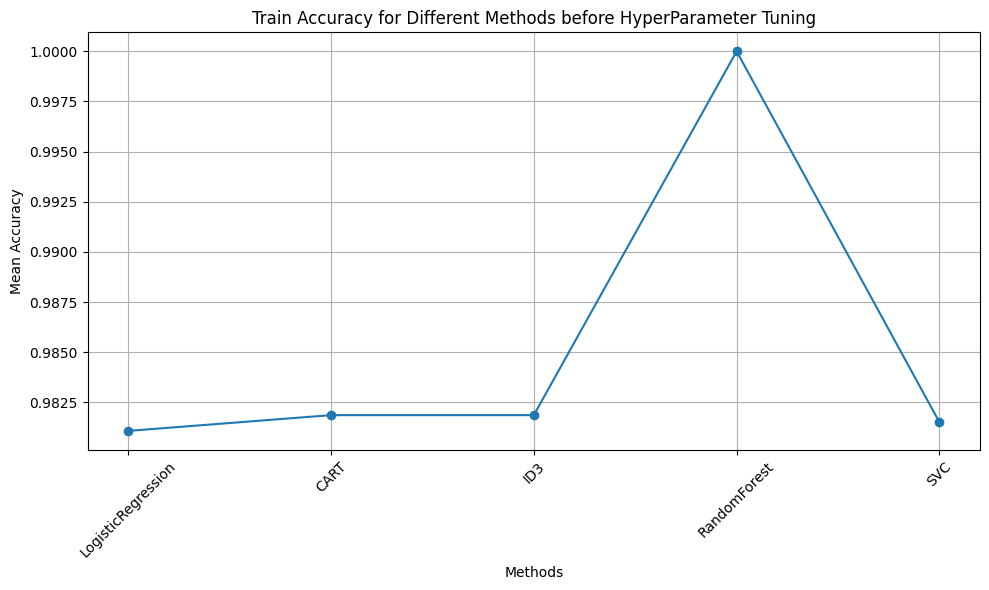

In [220]:
methods = ['LogisticRegression', 'CART', 'ID3', 'RandomForest', 'SVC']
train_accuracy = [train_lr, train_cart, train_id3, train_rf, train_svc]

plt.figure(figsize=(10, 6))
plt.plot(methods, train_accuracy, marker='o', linestyle='-')
plt.title('Train Accuracy for Different Methods before HyperParameter Tuning')
plt.xlabel('Methods')
plt.ylabel('Mean Accuracy')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

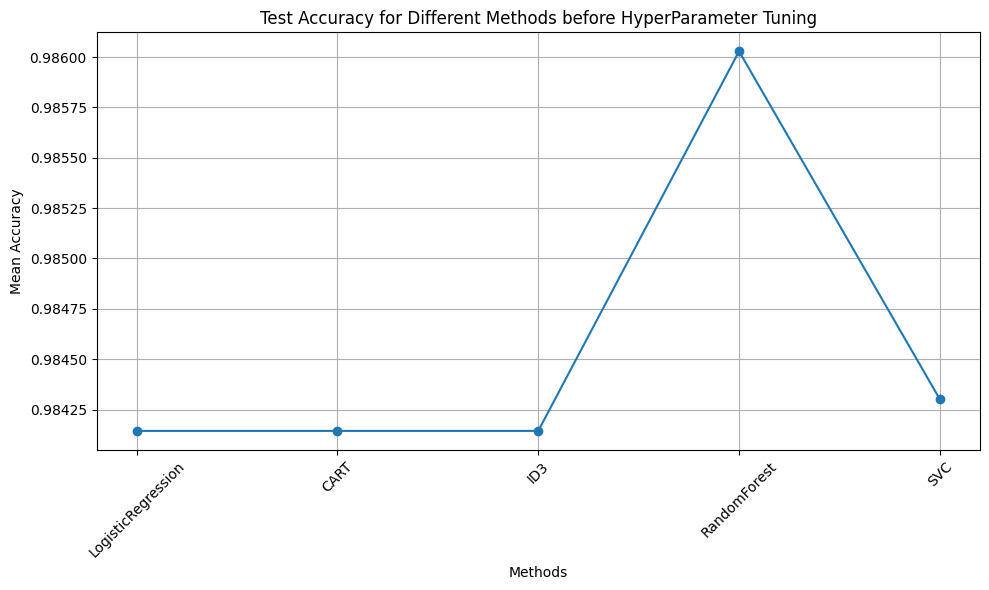

In [221]:
methods = ['LogisticRegression', 'CART', 'ID3', 'RandomForest', 'SVC']
test_accuracy = [test_lr, test_cart, test_id3, test_rf, test_svc]

plt.figure(figsize=(10, 6))
plt.plot(methods, test_accuracy, marker='o', linestyle='-')
plt.title('Test Accuracy for Different Methods before HyperParameter Tuning')
plt.xlabel('Methods')
plt.ylabel('Mean Accuracy')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

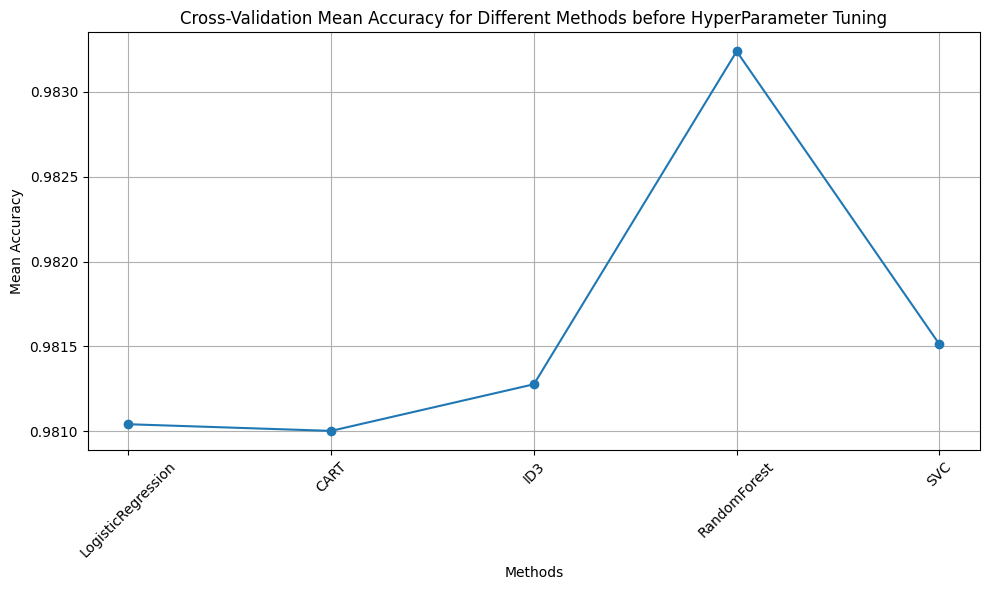

In [206]:
methods = ['LogisticRegression', 'CART', 'ID3', 'RandomForest', 'SVC']
cv_mean_accuracy = [cv_mean_accuracy_lr, cv_mean_accuracy_cart, cv_mean_accuracy_id3, cv_mean_accuracy_rf, cv_mean_accuracy_svc]

plt.figure(figsize=(10, 6))
plt.plot(methods, cv_mean_accuracy, marker='o', linestyle='-')
plt.title('Cross-Validation Mean Accuracy for Different Methods before HyperParameter Tuning')
plt.xlabel('Methods')
plt.ylabel('Mean Accuracy')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

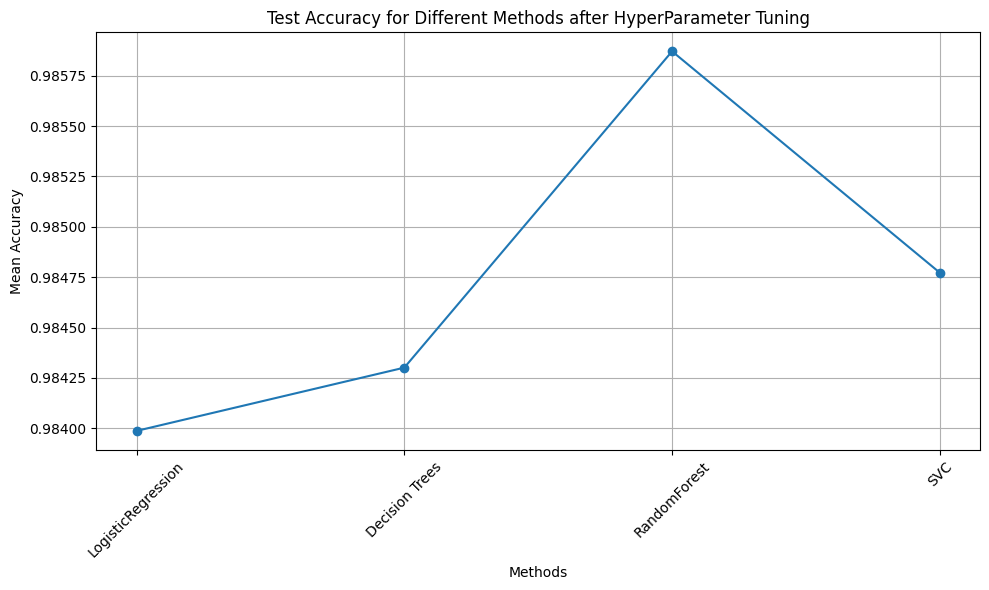

In [222]:
methods = ['LogisticRegression', 'Decision Trees', 'RandomForest', 'SVC']
hpt_accuracy = [accuracy_hyperparameter_lr, accuracy_hyperparameter_dt, accuracy_hyperparameter_rf, accuracy_hyperparameter_svc]

plt.figure(figsize=(10, 6))
plt.plot(methods, hpt_accuracy, marker='o', linestyle='-')
plt.title('Test Accuracy for Different Methods after HyperParameter Tuning')
plt.xlabel('Methods')
plt.ylabel('Mean Accuracy')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()